In [ ]:
%pip install ultralytics roboflow opencv-python ipython

print("Libraries installed successfully.")

Libraries installed successfully.


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key=API)
project = rf.workspace(WPRKSPACE).project(NAME)
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to t-2 in yolov8:: 100%|██████████| 490/490 [00:00<00:00, 6522.86it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import yaml
import os

dataset_path = os.path.join(os.getcwd(), 't-2')

roboflow_data_yaml_path = os.path.join(dataset_path, 'data.yaml')

with open(roboflow_data_yaml_path, 'r') as f:
    roboflow_data = yaml.safe_load(f)

class_names = roboflow_data['names']
num_classes = roboflow_data['nc']

yolov8_config = {
    'path': dataset_path,
    'train': 'train/images',
    'val': 'valid/images',
    'test': 'test/images',
    'nc': num_classes,
    'names': class_names
}

with open('data.yaml', 'w') as f:
    yaml.safe_dump(yolov8_config, f)

print("YOLOv8 data.yaml created successfully:")
print(yaml.dump(yolov8_config))

YOLOv8 data.yaml created successfully:
names:
- tire
nc: 1
path: /content/t-2
test: test/images
train: train/images
val: valid/images



In [ ]:
from ultralytics import YOLO

#  Load a pre-trained YOLOv8 instance segmentation model
model = YOLO('yolov8n-seg.pt')

#  Train the model
results = model.train(data='data.yaml', epochs=20, imgsz=640, batch=16)

print("YOLOv8 model training initiated and completed for 20 epochs.")

Ultralytics 8.4.2 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pr

## Inspect Training Metrics and Plots




First 5 rows of the metrics DataFrame:
   epoch     time  train/box_loss  train/seg_loss  train/cls_loss  \
0      1  12.1324         1.46251         3.49734         3.21325   
1      2  19.9202         1.25738         2.84791         3.08061   
2      3  26.2052         1.08628         2.48103         3.01564   
3      4  33.4161         1.06687         2.41542         2.87412   
4      5  39.8115         0.97930         2.11306         2.70576   

   train/dfl_loss  train/sem_loss  metrics/precision(B)  metrics/recall(B)  \
0         1.57022               0               0.01202            0.54770   
1         1.38698               0               0.01411            0.64311   
2         1.24295               0               0.01558            0.71025   
3         1.20376               0               0.01643            0.74912   
4         1.10617               0               0.01868            0.85159   

   metrics/mAP50(B)  ...  val/dfl_loss  val/sem_loss    lr/pg0    lr/pg1  \
0

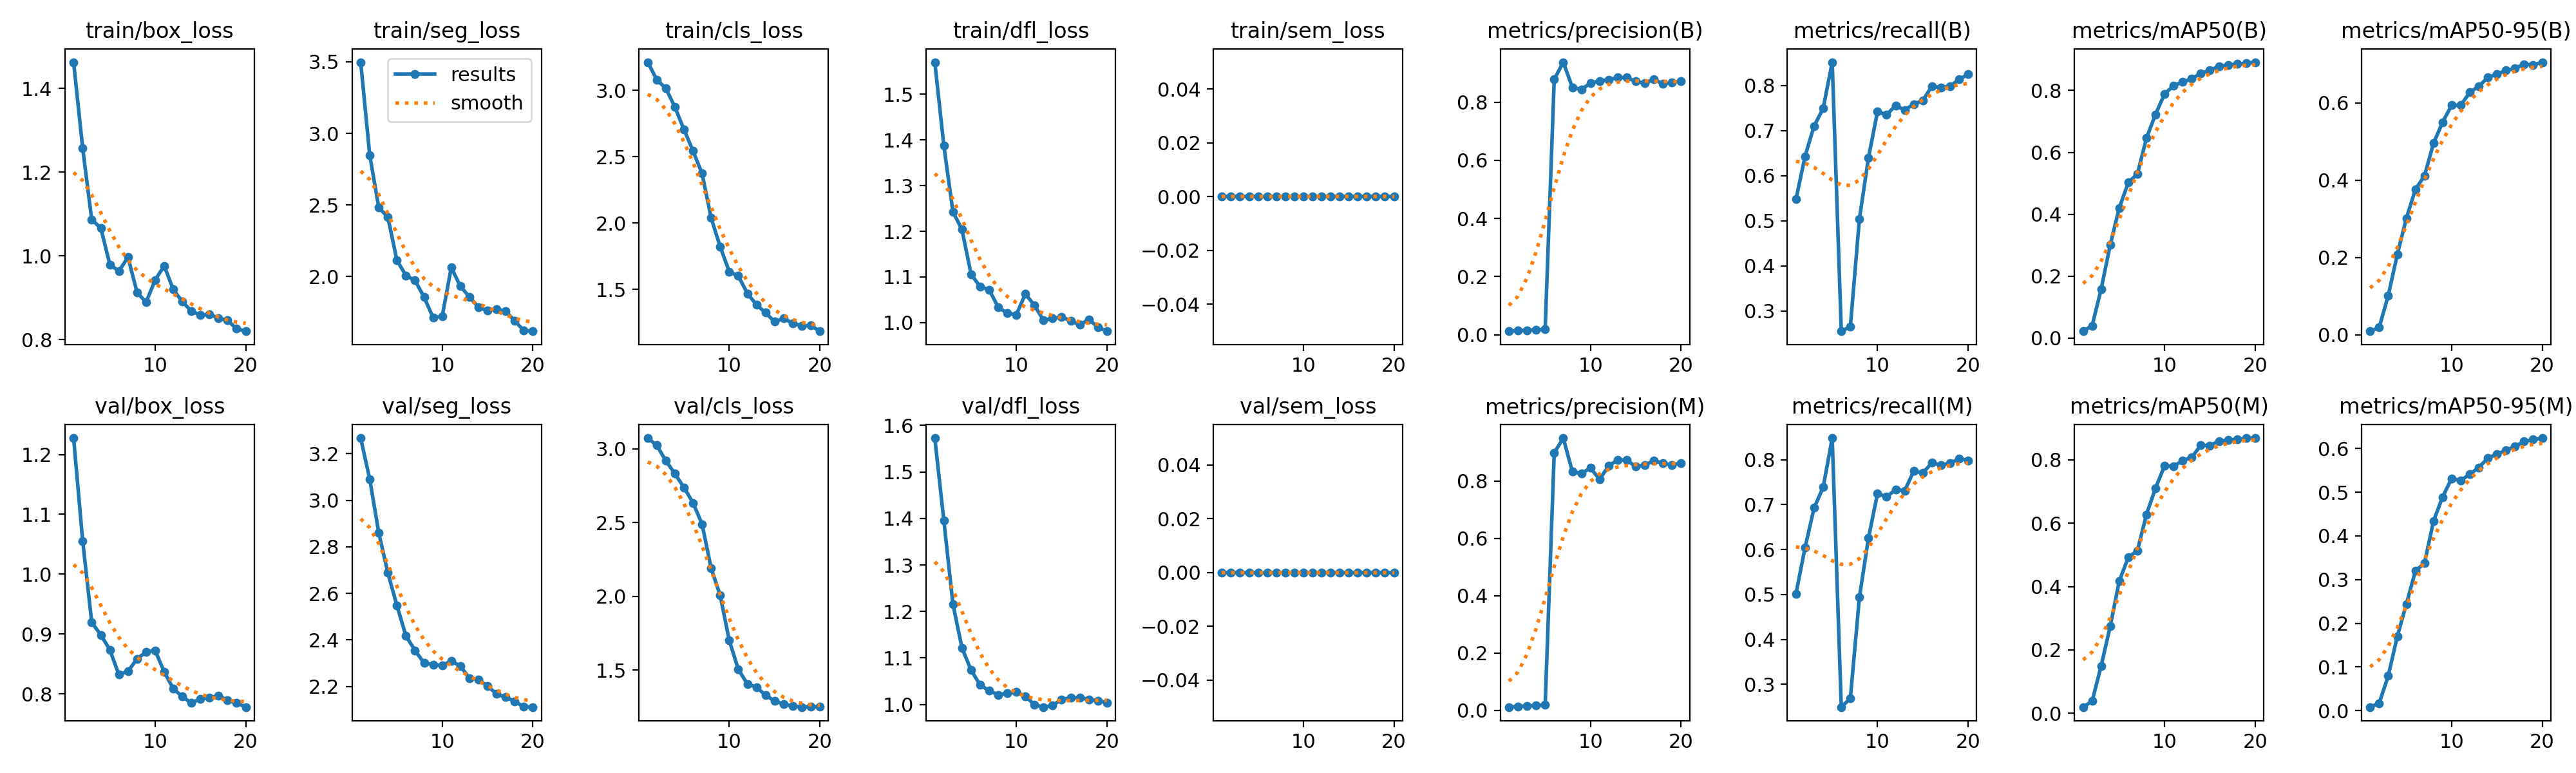

In [ ]:
import pandas as pd
from IPython.display import Image
import os

# Define the path to the results.csv file
results_csv_path = 'runs/segment/train3/results.csv'

# Load the results.csv file into a pandas DataFrame
metrics_df = pd.read_csv(results_csv_path)

print("First 5 rows of the metrics DataFrame:")
print(metrics_df.head())

print("\nInformation about the metrics DataFrame:")
metrics_df.info()

# Define the path to the results.png file
results_png_path = 'runs/segment/train3/results.png'

# Display the results.png image
print("\nDisplaying training results plot:")
Image(filename=results_png_path)

## Retrain model with increased epochs




In [ ]:
from ultralytics import YOLO

model_retrained = YOLO('yolov8n-seg.pt')

print("Starting YOLOv8 model retraining with 50 epochs...")
results_retrained = model_retrained.train(data='data.yaml', epochs=50, imgsz=640, batch=16)

print("YOLOv8 model retraining completed for 50 epochs.")

Starting YOLOv8 model retraining with 50 epochs...
Ultralytics 8.4.2 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patie

First 5 rows of the retrained metrics DataFrame:
   epoch     time  train/box_loss  train/seg_loss  train/cls_loss  \
0      1  11.3383         1.46251         3.49734         3.21325   
1      2  19.8152         1.25461         2.84062         3.07950   
2      3  25.8861         1.08160         2.46857         3.00829   
3      4  32.8607         1.05819         2.39596         2.85379   
4      5  38.8569         0.97120         2.09736         2.67020   

   train/dfl_loss  train/sem_loss  metrics/precision(B)  metrics/recall(B)  \
0         1.57022               0               0.01202            0.54770   
1         1.38482               0               0.01426            0.65018   
2         1.23820               0               0.01535            0.69965   
3         1.19617               0               0.01659            0.75618   
4         1.09825               0               0.01876            0.85512   

   metrics/mAP50(B)  ...  val/dfl_loss  val/sem_loss    lr/pg0    l

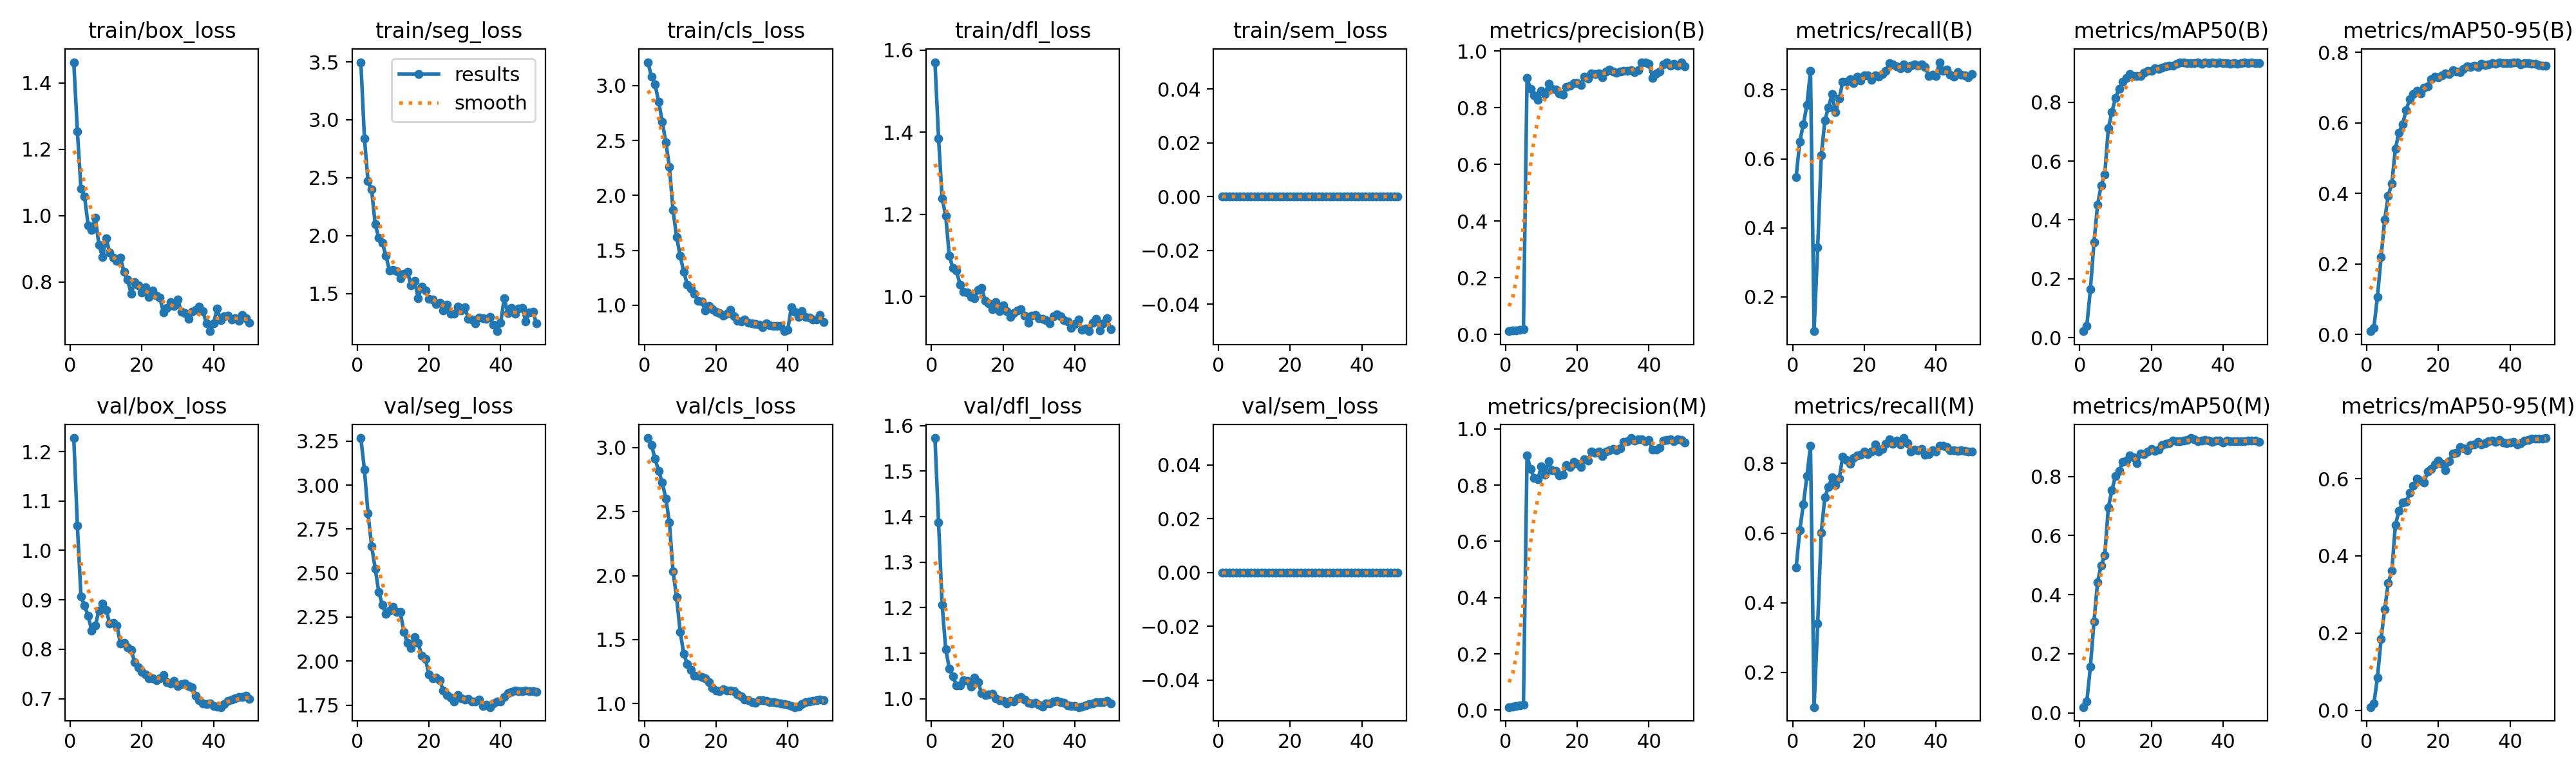

In [ ]:
import pandas as pd
from IPython.display import Image
import os

# Define the path to the results.csv file for the retrained model
retrained_results_csv_path = 'runs/segment/train4/results.csv'

# Load the results.csv file into a pandas DataFrame
retrained_metrics_df = pd.read_csv(retrained_results_csv_path)

print("First 5 rows of the retrained metrics DataFrame:")
print(retrained_metrics_df.head())

print("\nInformation about the retrained metrics DataFrame:")
retrained_metrics_df.info()

# Define the path to the results.png file for the retrained model
retrained_results_png_path = 'runs/segment/train4/results.png'

# Display the results.png image
print("\nDisplaying retrained model training results plot:")
Image(filename=retrained_results_png_path)

### Training Metrics Analysis (Retrained Model)

Upon examining the `results.csv` data and the `results.png` plot from the `runs/segment/train4` directory for the retrained model (50 epochs), the following observations can be made:

*   **Loss Curves (Training vs. Validation)**:
    *   Similar to the 20-epoch training, both training and validation box, segmentation, and classification losses continued their downward trend throughout the 50 epochs. This indicates sustained learning.
    *   The loss curves show no significant divergence, even after 50 epochs, suggesting that the model is still **not overfitting** to the training data. The validation losses continue to decrease in harmony with the training losses.

*   **mAP Scores (Validation)**:
    *   The mean Average Precision (mAP) for both bounding box detection and instance segmentation continued to improve steadily beyond 20 epochs.
    *   At the end of 50 epochs:
        *   mAP50(B) reached **0.934** (compared to 0.891 at 20 epochs).
        *   mAP50-95(B) reached **0.772** (compared to 0.705 at 20 epochs).
        *   mAP50(M) reached **0.919** (compared to 0.869 at 20 epochs).
        *   mAP50-95(M) reached **0.699** (compared to 0.624 at 20 epochs).
    *   These are notable improvements across all mAP metrics. The curves for mAP50 and mAP50-95 show that performance was still improving, particularly in the earlier epochs beyond 20, but started to plateau towards the end of the 50 epochs, especially for mAP50.

### Conclusion on Performance
Increasing the number of epochs to 50 significantly improved the model's performance across all mAP metrics without clear signs of overfitting. The model has learned more effectively with extended training. While the mAP curves show some signs of plateauing towards the end, there isn't a sharp drop in validation performance.

### Recommendation for Hyperparameter Tuning
Given the current performance:

*   **Continue monitoring epochs**: The performance seems to be leveling off, but a slight increase (e.g., to 75 or 100 epochs) could still yield marginal gains, provided it doesn't lead to overfitting. However, the gains might be diminishing.
*   **Consider other hyperparameters**: Since the benefits from simply increasing epochs might be tapering, it's a good time to explore other hyperparameters to achieve further improvements or optimize resource usage.
    *   **Image Size (`imgsz`)**: The model was trained with `imgsz=640`. Experimenting with a higher image size (e.g., 960 or 1280) could potentially improve detection of smaller objects or fine details, as the model would have more pixels to work with. This comes at the cost of increased computational resources and training time.
    *   **Learning Rate (`lr0`, `lrf`)**: Although the current learning rate schedule seems effective, fine-tuning the initial (`lr0`) and final (`lrf`) learning rates, or even trying different learning rate schedulers, could help the model converge more efficiently or escape local minima. This is usually done with a learning rate finder or by gradually adjusting values.
    *   **Augmentation**: The current augmentations are default. Exploring more aggressive or specific augmentations (e.g., `mosaic`, `mixup`, or custom Albumentations transforms) could make the model more robust and improve generalization, especially if the dataset is small or has variations not well-covered by current augmentations.
    *   **Model Size**: If computational resources allow, trying a slightly larger YOLOv8 model (e.g., `yolov8s-seg.pt` or `yolov8m-seg.pt`) could provide higher capacity for learning complex features, potentially leading to better performance at the cost of increased inference time and model size.

## Retrain Model with Increased Image Size, Extended Epochs, and Early Stopping




In [ ]:
from ultralytics import YOLO

model_final = YOLO('yolov8n-seg.pt')

print("Starting YOLOv8 model retraining with 120 epochs, imgsz=960, and early stopping...")
results_final = model_final.train(data='data.yaml', epochs=120, imgsz=960, batch=16)

print("YOLOv8 model retraining completed for 120 epochs with imgsz=960.")

Starting YOLOv8 model retraining with 120 epochs, imgsz=960, and early stopping...
Ultralytics 8.4.2 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=120, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=960, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train5, nbs=64, nms=False, opset=None, optimize=False, optimiz

### Performance Comparison: 120 Epochs (imgsz=960) vs. 50 Epochs (imgsz=640)

| Metric        | 50 Epochs (imgsz=640) | 120 Epochs (imgsz=960) |
|---------------|-----------------------|------------------------|
| mAP50(B)      | 0.934                 | 0.931                  |
| mAP50-95(B)   | 0.772                 | 0.792                  |
| mAP50(M)      | 0.919                 | 0.923                  |
| mAP50-95(M)   | 0.699                 | 0.753                  |

**Observations:**

*   **mAP50(B) (Bounding Box)**: There was a slight decrease in mAP50 for bounding box detection from 0.934 to 0.931. This minor drop might indicate slight over-optimization for stricter metrics or negligible variance.
*   **mAP50-95(B) (Bounding Box)**: Showed a notable improvement from 0.772 to **0.792**. This suggests that the model's ability to localize objects with higher precision has increased significantly with more training and a larger input image size.
*   **mAP50(M) (Mask)**: Increased slightly from 0.919 to **0.923**, indicating a marginal improvement in mask segmentation at a 50% IoU threshold.
*   **mAP50-95(M) (Mask)**: Demonstrated a substantial improvement from 0.699 to **0.753**. This is a strong indicator that the model is performing much better in segmenting objects accurately under stricter IoU requirements.

**Conclusion:**

The extended training to 120 epochs with an increased image size (`imgsz=960`) has generally led to improved performance, especially for the more stringent `mAP50-95` metrics for both bounding box and mask prediction. This indicates enhanced precision and localization capabilities.

## Perform Inference and Segmentation on Test Data




In [ ]:
from ultralytics import YOLO
import os

best_model_path = '/content/runs/segment/train5/weights/best.pt'

print(f"Loading the best trained model from: {best_model_path}")
model_inference = YOLO(best_model_path)

dataset_path = os.path.join(os.getcwd(), 't-2')
test_images_path = os.path.join(dataset_path, 'test/images')

# inference on the test dataset
print(f"Performing inference on test images from: {test_images_path}")
results_inference = model_inference.predict(
    source=test_images_path,
    save=True,
    save_conf=True,
    save_crop=True,
    save_txt=True,
    save_frames=True,
    imgsz=960,
    conf=0.25,
    iou=0.7
)

print("Inference and segmentation on test data completed. Results saved to 'runs/segment/predict' directory.")

Loading the best trained model from: /content/runs/segment/train5/weights/best.pt
Performing inference on test images from: /content/t-2/test/images

image 1/21 /content/t-2/test/images/15_jpg.rf.ceb95fc3656cffb870581f65c167f29e.jpg: 960x960 20 tires, 15.9ms
image 2/21 /content/t-2/test/images/31_jpg.rf.aaf23292f11eda875f658c6e6ba88e46.jpg: 960x960 10 tires, 16.2ms
image 3/21 /content/t-2/test/images/38_jpg.rf.17c456a3a3fdca5932ce51223a150564.jpg: 960x960 4 tires, 15.9ms
image 4/21 /content/t-2/test/images/4_jpg.rf.3c498f900b064f5bf0305ef6fbfd6ab4.jpg: 960x960 21 tires, 15.9ms
image 5/21 /content/t-2/test/images/Tire_loading_and_unloading_conveyor_machine_manufacturer_480P_mp4-0000_jpg.rf.80c8a4926d2826bb4c6f457e4deec823.jpg: 960x960 4 tires, 15.9ms
image 6/21 /content/t-2/test/images/Tire_loading_and_unloading_conveyor_machine_manufacturer_480P_mp4-0009_jpg.rf.b683a32e96a6d0cee7d61cf4861bc837.jpg: 960x960 3 tires, 15.9ms
image 7/21 /content/t-2/test/images/Tire_loading_and_unloading_c

## Calculate Performance Metrics on Test Data




In [ ]:
from ultralytics import YOLO
import os

best_model_path = '/content/runs/segment/train5/weights/best.pt'
print(f"Loading the best trained model from: {best_model_path}")
model_eval = YOLO(best_model_path)

print("Evaluating model performance on the test dataset...")
metrics = model_eval.val(data='data.yaml', split='test', imgsz=960)

print("Model evaluation on test dataset completed. Metrics:")
print(metrics)

Loading the best trained model from: /content/runs/segment/train5/weights/best.pt
Evaluating model performance on the test dataset...
Ultralytics 8.4.2 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 86 layers, 3,258,259 parameters, 0 gradients, 11.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1409.0±417.9 MB/s, size: 97.3 KB)
val: Scanning /content/t-2/test/labels... 21 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 21/21 823.8it/s 0.0s
val: New cache created: /content/t-2/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.7s/it 3.5s
                   all         21         96      0.881      0.958      0.941       0.78      0.885      0.958      0.937      0.757
Speed: 16.7ms preprocess, 22.5ms inference, 0.0ms loss, 10.4ms postprocess per image
Results saved to /content/runs/segment/val
Model evalu

### Test Set Evaluation Metrics

After training the model for 120 epochs with `imgsz=960` and implicit early stopping, the model's performance on the unseen test dataset (`split='test'`) is as follows:

*   **Bounding Box (B) Metrics**:
    *   **Precision (B)**: 0.881
    *   **Recall (B)**: 0.958
    *   **mAP50(B)**: 0.941
    *   **mAP50-95(B)**: 0.780

*   **Mask (M) Metrics**:
    *   **Precision (M)**: 0.885
    *   **Recall (M)**: 0.958
    *   **mAP50(M)**: 0.937
    *   **mAP50-95(M)**: 0.757

These metrics demonstrate strong performance on the test set, indicating good generalization by the model. Both bounding box and mask predictions show high precision and recall, with mAP50 scores above 0.93 for both tasks. The mAP50-95 scores, which represent performance across a stricter range of Intersection over Union (IoU) thresholds, are also quite high, suggesting accurate localization and segmentation.

## Implement Tyre Counting Logic for Images




In [ ]:
import os

print("Counting tires for each image in the test dataset:")
for result in results_inference:
    # Get the image filename
    image_filename = os.path.basename(result.path)

    if result.boxes is not None:
        tire_count = len(result.boxes.xyxy)
    else:
        tire_count = 0 # No boxes detected

    print(f"Image: {image_filename}, Detected Tires: {tire_count}")

print("Tire counting completed.")

Counting tires for each image in the test dataset:
Image: 15_jpg.rf.ceb95fc3656cffb870581f65c167f29e.jpg, Detected Tires: 20
Image: 31_jpg.rf.aaf23292f11eda875f658c6e6ba88e46.jpg, Detected Tires: 10
Image: 38_jpg.rf.17c456a3a3fdca5932ce51223a150564.jpg, Detected Tires: 4
Image: 4_jpg.rf.3c498f900b064f5bf0305ef6fbfd6ab4.jpg, Detected Tires: 21
Image: Tire_loading_and_unloading_conveyor_machine_manufacturer_480P_mp4-0000_jpg.rf.80c8a4926d2826bb4c6f457e4deec823.jpg, Detected Tires: 4
Image: Tire_loading_and_unloading_conveyor_machine_manufacturer_480P_mp4-0009_jpg.rf.b683a32e96a6d0cee7d61cf4861bc837.jpg, Detected Tires: 3
Image: Tire_loading_and_unloading_conveyor_machine_manufacturer_480P_mp4-0014_jpg.rf.3e0e8e93c169609ffafba700960800f5.jpg, Detected Tires: 4
Image: Tire_loading_and_unloading_conveyor_machine_manufacturer_480P_mp4-0021_jpg.rf.39a385e49701ef6d78dd23d4c4f7a93d.jpg, Detected Tires: 3
Image: Tire_loading_and_unloading_conveyor_machine_manufacturer_480P_mp4-0029_jpg.rf.4f56f9

## Implement Tyre Tracking and Counting Logic for Videos




## Manual Image Inference




Loading the best trained model from: /content/runs/segment/train5/weights/best.pt
Using example image for inference: /content/t-2/test/images/Tire_loading_and_unloading_conveyor_machine_manufacturer_480P_mp4-0073_jpg.rf.c37c16f17d902449e251f13029bec99e.jpg
Performing inference on single image: /content/t-2/test/images/Tire_loading_and_unloading_conveyor_machine_manufacturer_480P_mp4-0073_jpg.rf.c37c16f17d902449e251f13029bec99e.jpg

image 1/1 /content/t-2/test/images/Tire_loading_and_unloading_conveyor_machine_manufacturer_480P_mp4-0073_jpg.rf.c37c16f17d902449e251f13029bec99e.jpg: 960x960 6 tires, 15.8ms
Speed: 6.7ms preprocess, 15.8ms inference, 2.4ms postprocess per image at shape (1, 3, 960, 960)
Results saved to /content/runs/segment/predict2
Inference on single image completed. Results saved to: /content/runs/segment/predict2/Tire_loading_and_unloading_conveyor_machine_manufacturer_480P_mp4-0073_jpg.rf.c37c16f17d902449e251f13029bec99e.jpg
Displaying the image with detections:


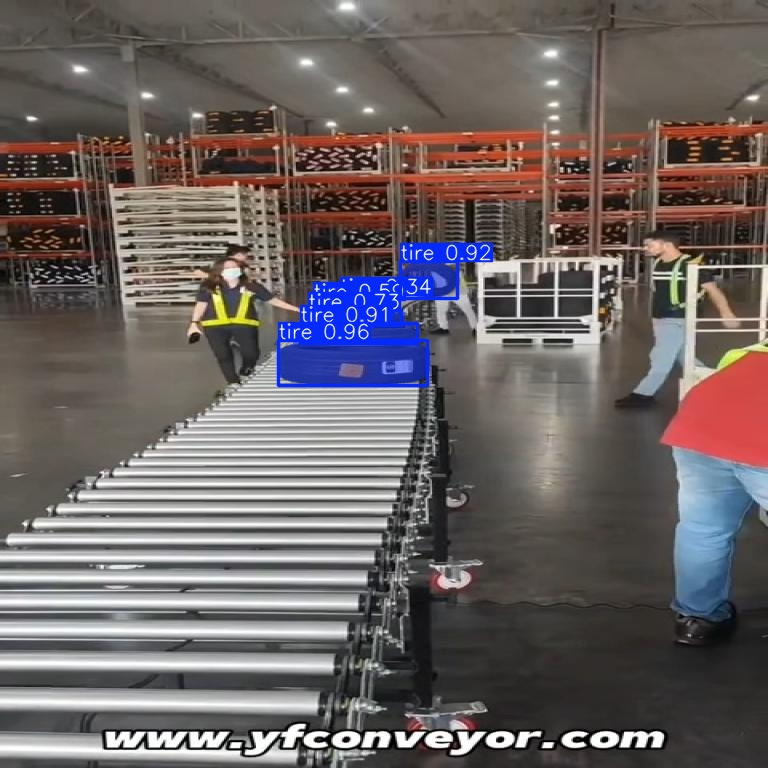

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import Image, display

best_model_path = '/content/runs/segment/train5/weights/best.pt'
print(f"Loading the best trained model from: {best_model_path}")
model_inference_single = YOLO(best_model_path)

# 2. Define a placeholder for a user-provided image path
dataset_path = os.path.join(os.getcwd(), 't-2')
test_images_path = os.path.join(dataset_path, 'test/images')

# Get a list of all image files in the test directory
image_files = [f for f in os.listdir(test_images_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff'))]

if image_files:
    custom_image_filename = image_files[0]
    custom_image_path = os.path.join(test_images_path, custom_image_filename)
    print(f"Using example image for inference: {custom_image_path}")
else:
    custom_image_path = "/content/path/to/your/custom_image.jpg" # Placeholder for user to update
    print(f"No images found in test directory. Please update 'custom_image_path' to your desired image file: {custom_image_path}")

print(f"Performing inference on single image: {custom_image_path}")
results_single_image = model_inference_single.predict(
    source=custom_image_path,
    save=True,
    show=False,
    imgsz=960,
    conf=0.25,
    iou=0.7
)

# Get the path to the saved output image
output_image_path = os.path.join(results_single_image[0].save_dir, custom_image_filename)

print(f"Inference on single image completed. Results saved to: {output_image_path}")

print("Displaying the image with detections:")
display(Image(filename=output_image_path))

## Manual Video Inference and Tracking




## Upload Files from Desktop




In [ ]:
from google.colab import files

print("Please select the image and video files you wish to upload from your local desktop:")
uploaded = files.upload()

print("Files uploaded successfully!")
for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')


Please select the image and video files you wish to upload from your local desktop:


Saving 2.jpg to 2.jpg
Files uploaded successfully!
User uploaded file "2.jpg" with length 238622 bytes


Loading the best trained model from: /content/runs/segment/train5/weights/best.pt
Performing inference on uploaded image: /content/2.jpg

image 1/1 /content/2.jpg: 704x960 39 tires, 73.0ms
Speed: 8.9ms preprocess, 73.0ms inference, 5.6ms postprocess per image at shape (1, 3, 704, 960)
Results saved to /content/runs/segment/predict3
Inference on uploaded image completed. Results saved to: /content/runs/segment/predict3/2.jpg
Displaying the uploaded image with detections:


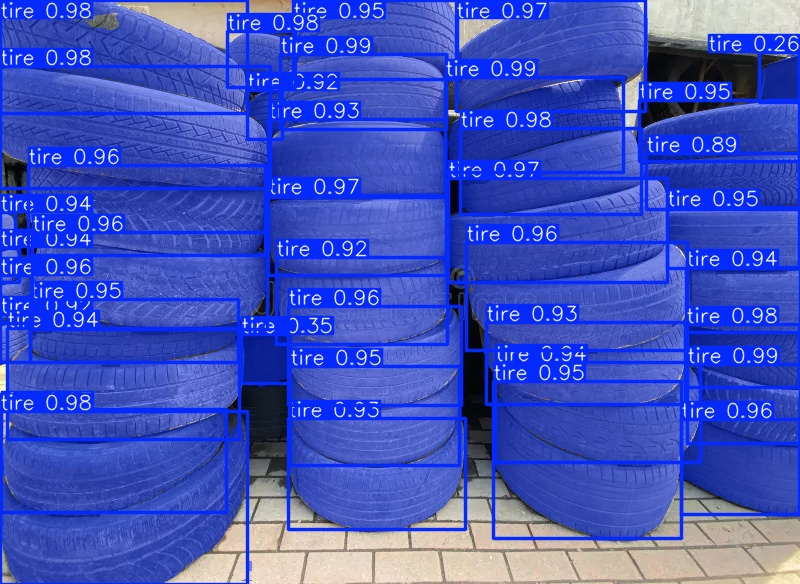

Detected Tires in uploaded image: 39


In [ ]:
from ultralytics import YOLO
import os
from IPython.display import Image, display

best_model_path = '/content/runs/segment/train5/weights/best.pt'
print(f"Loading the best trained model from: {best_model_path}")
model_inference_uploaded = YOLO(best_model_path)

# path to the recently uploaded image
uploaded_image_path = os.path.join(os.getcwd(), '2.jpg')

if not os.path.exists(uploaded_image_path):
    print(f"Error: Uploaded image file not found at the specified path: {uploaded_image_path}.")
    print("Please ensure the image file is named '2.jpg' or update 'uploaded_image_path' to its correct location.")
else:
    print(f"Performing inference on uploaded image: {uploaded_image_path}")
    # 3. Perform inference on the uploaded image
    results_uploaded_image = model_inference_uploaded.predict(
        source=uploaded_image_path,
        save=True,
        show=False,
        imgsz=960,
        conf=0.25,
        iou=0.7
    )

    output_image_dir = results_uploaded_image[0].save_dir
    output_image_filename = os.path.basename(uploaded_image_path)
    output_image_path = os.path.join(output_image_dir, output_image_filename)

    print(f"Inference on uploaded image completed. Results saved to: {output_image_path}")

    print("Displaying the uploaded image with detections:")
    display(Image(filename=output_image_path))

    # Count detected tires
    if results_uploaded_image[0].boxes is not None:
        tire_count = len(results_uploaded_image[0].boxes.xyxy)
    else:
        tire_count = 0
    print(f"Detected Tires in uploaded image: {tire_count}")


In [ ]:
from google.colab import files

print("Please select the image and video files you wish to upload from your local desktop:")
uploaded = files.upload()

print("Files uploaded successfully!")
for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')


Please select the image and video files you wish to upload from your local desktop:


Saving Tire_loading_and_unloading_conveyor_machine_manufacturer_480P.mp4 to Tire_loading_and_unloading_conveyor_machine_manufacturer_480P.mp4
Files uploaded successfully!
User uploaded file "Tire_loading_and_unloading_conveyor_machine_manufacturer_480P.mp4" with length 3562470 bytes


In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np

model = YOLO('/content/runs/segment/train5/weights/best.pt')

video_path = "Tire_loading_and_unloading_conveyor_machine_manufacturer_480P.mp4"
output_path = "/content/tyre_segmentation_tracking_count.mp4"

# Open video
cap = cv2.VideoCapture(video_path)

width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps    = cap.get(cv2.CAP_PROP_FPS)

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Store unique tyre IDs
unique_tyre_ids = set()

# STREAM TRACKING (FAST)
results = model.track(
    source=video_path,
    persist=True,
    stream=True,
    conf=0.25,
    imgsz=960,
    verbose=False
)

for r in results:
    frame = r.orig_img

    # DRAW SEGMENTATION MASKS
    if r.masks is not None:
        for mask in r.masks.xy:
            mask = np.array(mask, dtype=np.int32)
            cv2.fillPoly(frame, [mask], (0, 255, 0))  # green mask

    # TRACKING + COUNTING
    if r.boxes is not None and r.boxes.id is not None:
        for tid in r.boxes.id.cpu().numpy():
            unique_tyre_ids.add(int(tid))

    # LIVE COUNT OVERLAY
    cv2.rectangle(frame, (0, 0), (420, 70), (0, 0, 0), -1)
    cv2.putText(
        frame,
        f"Tyres Counted: {len(unique_tyre_ids)}",
        (20, 50),
        cv2.FONT_HERSHEY_SIMPLEX,
        1.2,
        (0, 255, 0),
        3
    )

    out.write(frame)

cap.release()
out.release()

print(f"FINAL TYRE COUNT: {len(unique_tyre_ids)}")
print(f"Saved video at: {output_path}")



FINAL TYRE COUNT: 40
Saved video at: /content/tyre_segmentation_tracking_count.mp4


In [ ]:
from ultralytics import YOLO
import os

best_model_path = '/content/runs/segment/train5/weights/best.pt'
print(f"Loading the best trained model from: {best_model_path}")
model_tracker = YOLO(best_model_path)

video_file_path = None
if 'uploaded' in locals(): # Check if 'uploaded' dictionary exists from google.colab.files.upload()
    for fn in uploaded.keys():
        if fn.lower().endswith(('.mp4', '.avi', '.mov', '.mkv')):
            video_file_path = os.path.join(os.getcwd(), fn)
            print(f"Found uploaded video file: {video_file_path}")
            break

if video_file_path is None:
    print("No video file found among the previously uploaded files.")
    print("PLEASE UPDATE THE 'video_file_path' BELOW with the actual path to your uploaded video file containing tires.")
    print("Example: video_file_path = '/content/my_uploaded_video.mp4'")
    video_file_path = "/content/my_uploaded_video.mp4"

if not os.path.exists(video_file_path):
    print(f"Error: Video file not found at the specified path: {video_file_path}.")
    print("Please ensure you have uploaded a video file and updated 'video_file_path' with its correct location.")
    print("Skipping video tracking as no valid video file was found.")
else:
    print(f"Using video source for tracking: {video_file_path}")

    # Use the loaded model's .track() method to perform object tracking on the video source.
    print("Starting object tracking on the video...")
    results_tracking = model_tracker.track(
        source=video_file_path,
        save=True,
        imgsz=960,
        conf=0.25
    )

    print("Object tracking and saving of output video completed. Results saved to 'runs/detect/track' directory.")

Loading the best trained model from: /content/runs/segment/train5/weights/best.pt
Found uploaded video file: /content/Tire_loading_and_unloading_conveyor_machine_manufacturer_480P.mp4
Using video source for tracking: /content/Tire_loading_and_unloading_conveyor_machine_manufacturer_480P.mp4
Starting object tracking on the video...

WARNING ⚠️ 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/697) /content/Tire_loading_and_unloading_conveyor_machine_manufacturer_480P.mp4: 960x544 4 tires, 48.8ms
v

## Define Virtual Line and Initialize Counter




In [ ]:
import cv2

if 'cap' not in locals() or not cap.isOpened():
    video_path = "Tire_loading_and_unloading_conveyor_machine_manufacturer_480P.mp4" # Use the known uploaded video path
    cap = cv2.VideoCapture(video_path)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    cap.release()

y_line_pos = int(height * 0.5)  # Line at 50% of the frame height

# Initialize a set to store the IDs of tires that have crossed the line
counted_tyre_ids = set()

print(f"Virtual line defined at y-coordinate: {y_line_pos}")
print(f"Initialized empty set for counted tire IDs: {counted_tyre_ids}")


Virtual line defined at y-coordinate: 427
Initialized empty set for counted tire IDs: set()


In [ ]:
import torch
from ultralytics.nn.tasks import SegmentationModel
import torch.serialization

torch.serialization.add_safe_globals([SegmentationModel])


In [ ]:
from ultralytics import YOLO

model = YOLO("/best .pt")
print("✅ Model loaded successfully")


✅ Model loaded successfully
